# circle - non linear dataset 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

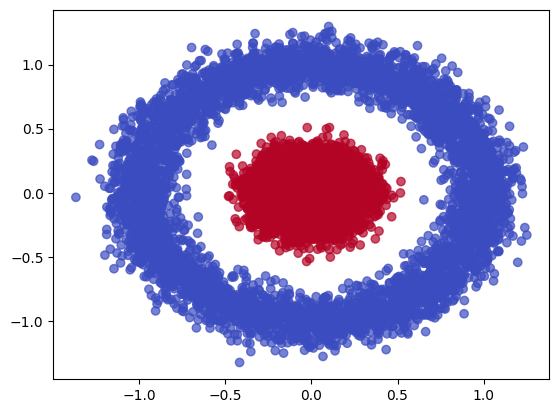

In [37]:
X, y = make_circles(n_samples=10000, noise=0.1, factor=0.2, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [38]:
df_circles = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df_circles["target"] = y

In [39]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0


### correlation matrix

In [40]:
df_circles.iloc[:,:-1].corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_1,1.000000,0.001393,-0.019753,-0.011798,0.008292,-0.003524,-0.007690,-0.017684,-0.002194,0.000630
Feature_2,0.001393,1.000000,0.000885,0.010689,0.005713,0.002513,-0.007400,-0.015922,0.008412,0.015957
Feature_3,-0.019753,0.000885,1.000000,-0.018067,-0.010657,-0.016274,0.002762,0.007705,0.011548,0.000819
Feature_4,-0.011798,0.010689,-0.018067,1.000000,-0.007918,-0.015515,-0.004475,-0.003595,0.014404,0.000919
Feature_5,0.008292,0.005713,-0.010657,-0.007918,1.000000,-0.012921,0.005788,-0.006868,-0.016123,-0.000904
Feature_6,-0.003524,0.002513,-0.016274,-0.015515,-0.012921,1.000000,-0.026388,0.002884,-0.001055,0.012069
Feature_7,-0.007690,-0.007400,0.002762,-0.004475,0.005788,-0.026388,1.000000,0.003194,0.008518,-0.017122
Feature_8,-0.017684,-0.015922,0.007705,-0.003595,-0.006868,0.002884,0.003194,1.000000,-0.020254,-0.000089
Feature_9,-0.002194,0.008412,0.011548,0.014404,-0.016123,-0.001055,0.008518,-0.020254,1.000000,0.000394
Feature_10,0.000630,0.015957,0.000819,0.000919,-0.000904,0.012069,-0.017122,-0.000089,0.000394,1.000000


<Axes: >

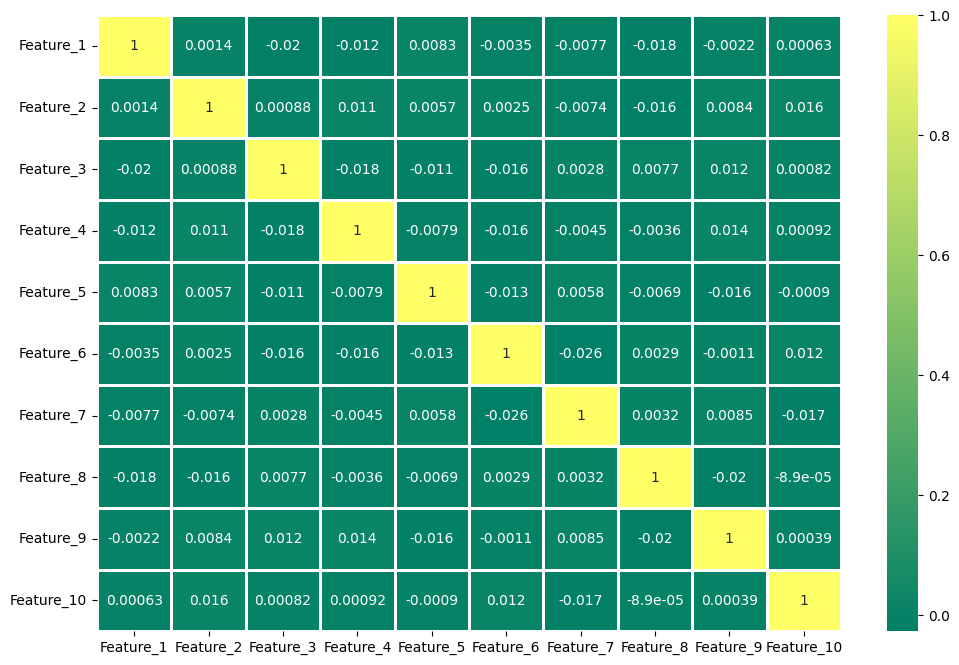

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df_circles.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [42]:
X_values = df_circles.iloc[:,:-1].values

In [43]:
y_values = df_circles.iloc[:,-1].values

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_values = scaler.fit_transform(X_values)

In [47]:
np.mean(X_values),np.std(X_values)

(-1.8989254613188677e-17, 1.0000000000000002)

In [48]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.309049,0.544134,-0.448047,0.419145,0.511834,-0.677851,0.147148,-0.438576,-1.407600,2.450492
1,2.313386,-1.040751,0.539051,-1.095422,-0.135613,1.837940,-1.443347,-0.274278,0.156080,-0.372575
2,-1.198062,1.401072,0.119547,1.475181,-1.441128,-1.004648,-0.062471,1.146647,0.846499,-0.355679
3,2.066837,-0.653542,-1.300356,-0.534492,-0.516486,0.543089,0.058852,0.258127,0.888339,0.740036
4,1.626991,-0.965343,-0.222843,-0.439613,-0.152778,-0.107947,-0.752183,-1.145748,-1.472451,-0.967557
...,...,...,...,...,...,...,...,...,...,...
9995,0.376839,0.468127,-0.206919,-0.540809,-0.522242,-1.046523,0.243705,-1.804486,0.420821,-1.104665
9996,0.460620,0.272608,-0.440049,-0.726433,0.622449,0.184647,-1.082635,0.341676,-0.200960,0.945248
9997,0.207503,0.159001,1.124784,-1.031468,0.638947,0.150229,0.812272,0.890994,0.304026,-0.016421
9998,0.931093,1.713429,-1.020998,1.725231,-0.404515,-0.806645,-1.495453,-1.225963,1.168259,-1.166567


## pca application

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca_general = PCA()

In [51]:
pca_general.fit(X_values)

PCA()

In [52]:
explained_variance = pca_general.explained_variance_ratio_

In [53]:
explained_variance

array([0.10492691, 0.10394865, 0.10357124, 0.10124632, 0.10084403,
       0.09858941, 0.09816339, 0.09755061, 0.09661675, 0.09454268])

In [54]:
eigenvalues = pca_general.explained_variance_

In [55]:
pd.DataFrame(eigenvalues)

,0
0,1.049374
1,1.039590
2,1.035816
3,1.012564
4,1.008541
5,0.985993
6,0.981732
7,0.975604
8,0.966264
9,0.945521


In [56]:
eigenvectors = pca_general.components_

### scree plot

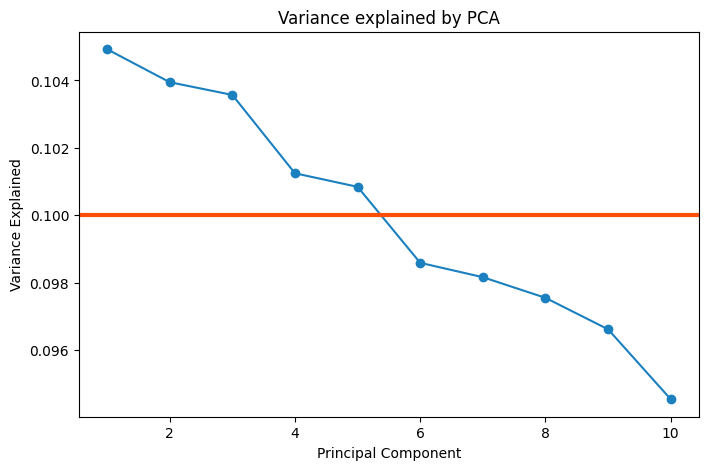

In [57]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [58]:
pca = PCA(n_components=2)

In [59]:
principal_components = pca.fit_transform(X_values)

In [60]:
pd.DataFrame(principal_components).head(8)

,0,1
0,-1.164080,-0.031467
1,-1.537533,-1.443721
2,0.707132,1.398110
3,-1.213115,-0.241303
4,-0.469454,-0.806773
5,-0.388012,0.849237
6,-0.391091,1.658783
7,-0.506973,-1.172078


In [61]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [62]:
final_df = pd.concat([principal_df,df_circles[['target']]],axis=1)

In [63]:
final_df

,principal component 1,principal component 2,target
0,-1.164080,-0.031467,1
1,-1.537533,-1.443721,0
2,0.707132,1.398110,0
3,-1.213115,-0.241303,0
4,-0.469454,-0.806773,0
...,...,...,...
9995,0.224135,1.496436,1
9996,-1.242629,-0.828582,1
9997,0.937435,-0.517829,1
9998,-1.578773,2.600580,0


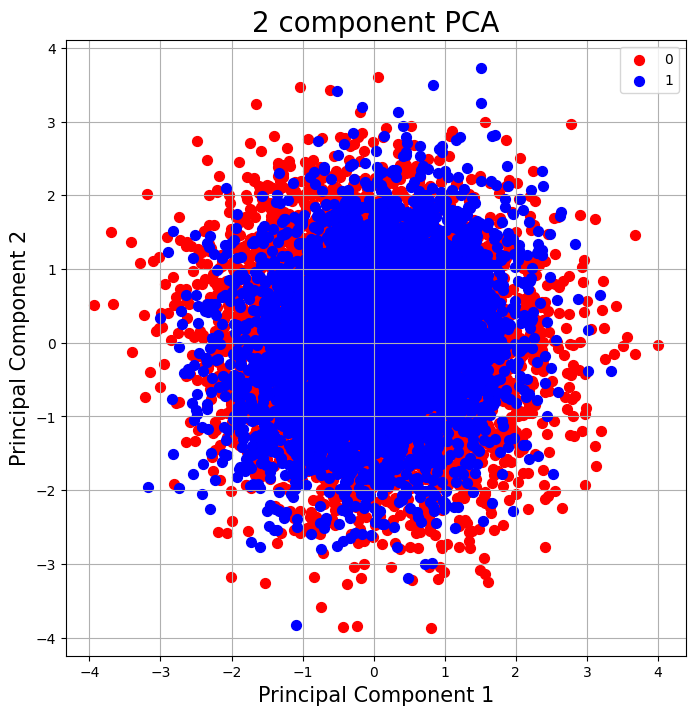

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

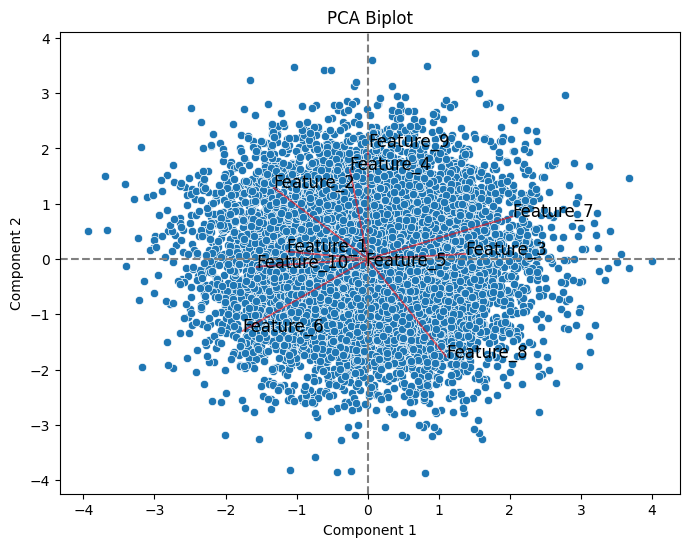

In [65]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_circles.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

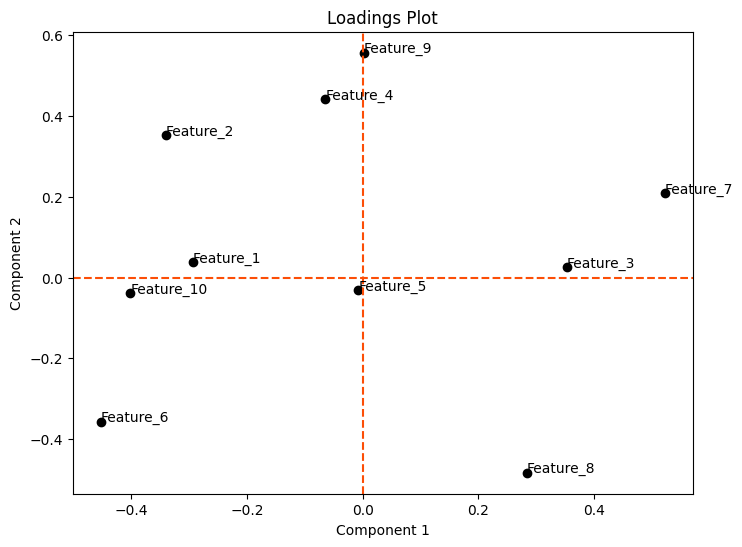

In [66]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_circles.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [67]:
scores_pca = pca.transform(X_values)

In [68]:
pd.DataFrame(scores_pca).head()

,0,1
0,-1.164080,-0.031467
1,-1.537533,-1.443721
2,0.707132,1.398110
3,-1.213115,-0.241303
4,-0.469454,-0.806773


## t-SNE

In [69]:
tsne = TSNE(n_components=2,random_state=42)

In [70]:
X_tsne = tsne.fit_transform(X_values)

In [71]:
tsne_data = np.vstack((X_tsne.T,df_circles['target'])).T

In [72]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [73]:
tsne_df

,dim_1,dim_2,target
0,-28.167200,-6.938606,1.0
1,-39.050091,-55.989082,0.0
2,-17.988604,76.614357,0.0
3,-71.406387,-26.289158,0.0
4,-10.717715,-61.842422,0.0
...,...,...,...
9995,-6.033642,-40.350311,1.0
9996,-3.548430,48.115189,1.0
9997,20.738562,-5.850298,1.0
9998,-60.200394,54.423405,0.0


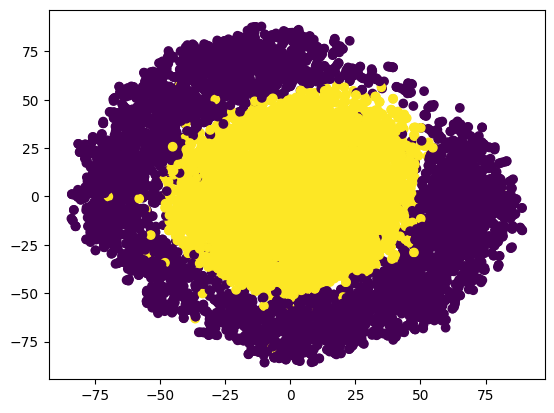

In [74]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [75]:
tsne.kl_divergence_

3.1247222423553467

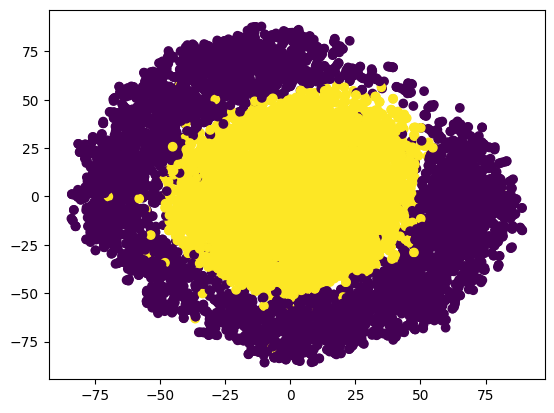

In [76]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [77]:
from sklearn.cluster import KMeans

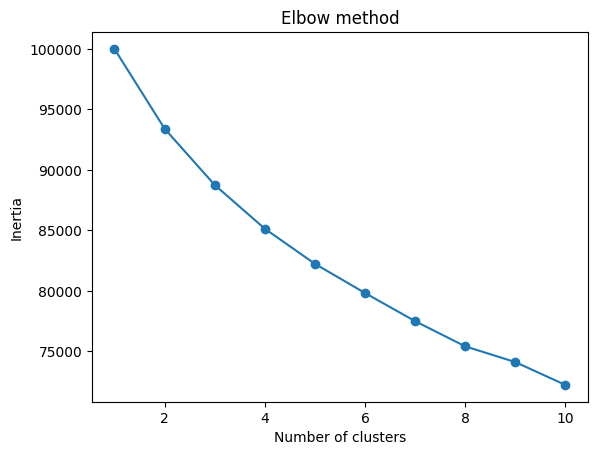

In [78]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [79]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [80]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [81]:
df_circles['k_means'] = kmeans.labels_

In [82]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,0
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,0
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,1
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,0
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,1
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,0
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,1
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,0


In [83]:
from scipy.optimize import linear_sum_assignment

y_true = df_circles['target'].values  
y_kmeans = df_circles['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_circles['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_circles['k_means'] == y_true))

accuracy before: 0.4976
accuracy after: 0.5024


In [84]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,1
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,1
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,0
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,1
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,0
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,1
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,0
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,1


In [85]:
print(np.unique(df_circles['target']))

[0 1]


In [86]:
print(np.unique(kmeans.labels_))

[0 1]


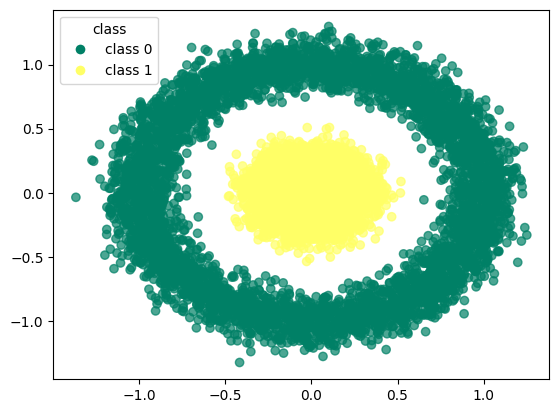

In [87]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_circles['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

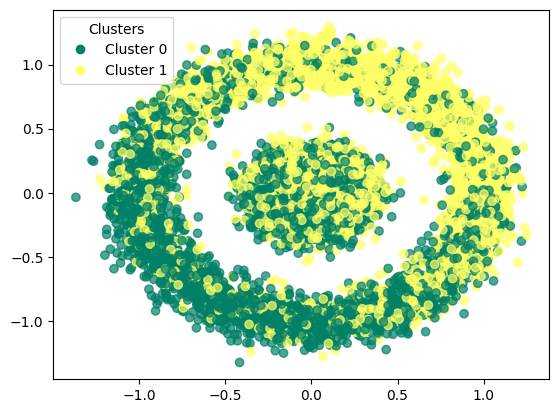

In [88]:
scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_circles['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [89]:
kmeans.cluster_centers_

array([[ 0.24261587,  0.30134053, -0.29596176, -0.0246522 ,  0.20757061,
         0.34766242, -0.43976511, -0.01128371, -0.15228635,  0.26530807],
       [-0.23752636, -0.29501912,  0.28975318,  0.02413506, -0.20321627,
        -0.34036929,  0.43053988,  0.011047  ,  0.14909175, -0.25974254]])

In [90]:
print(confusion_matrix(df_circles['target'],df_circles['k_means']))

[[2538 2462]
 [2514 2486]]


In [91]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### clustering with pca

In [92]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

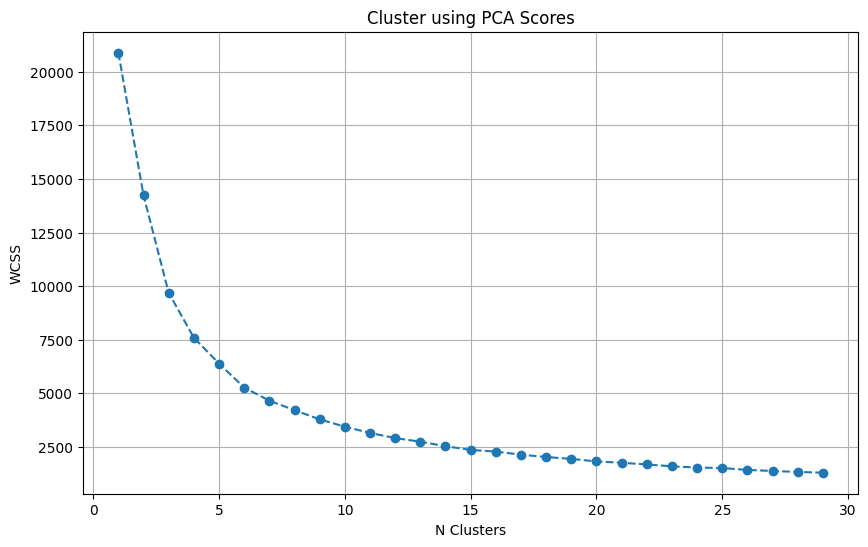

In [93]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [94]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [95]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [96]:
df_pca_kmeans = df_circles.copy()

In [97]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [98]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,1,0
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,1,0
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,0,1
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,1,0
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,0,1
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,1,0
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,0,1
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,1,0


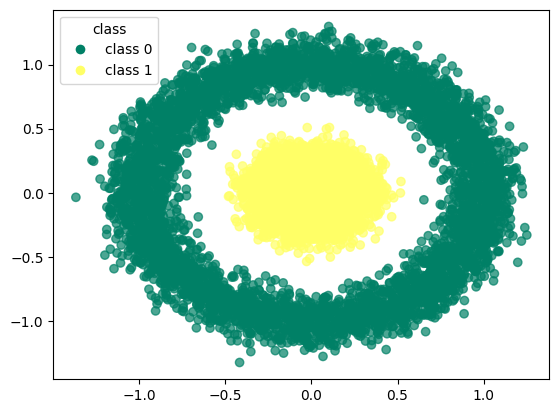

In [99]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

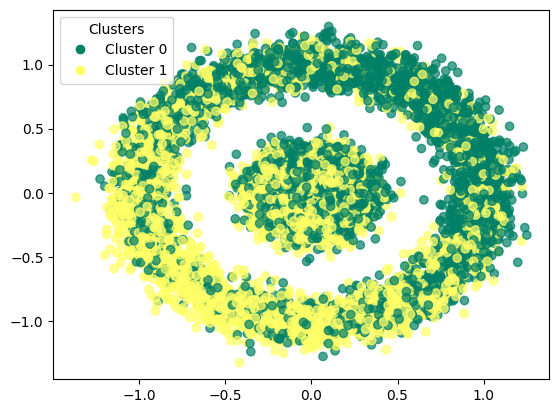

In [100]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [101]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.4996
accuracy after: 0.5004


In [102]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,1,1
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,1,1
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,0,0
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,1,1
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,0,0
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,1,1
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,0,0
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,1,1


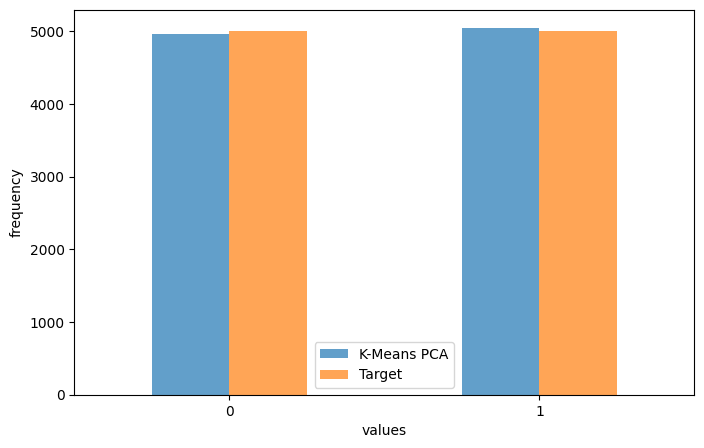

In [103]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [104]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2480 2520]
 [2476 2524]]


In [105]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [106]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



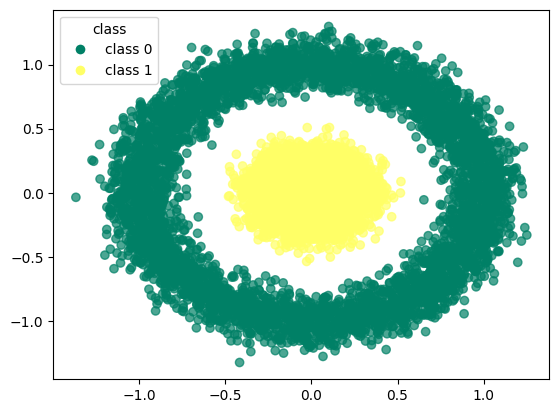

In [107]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

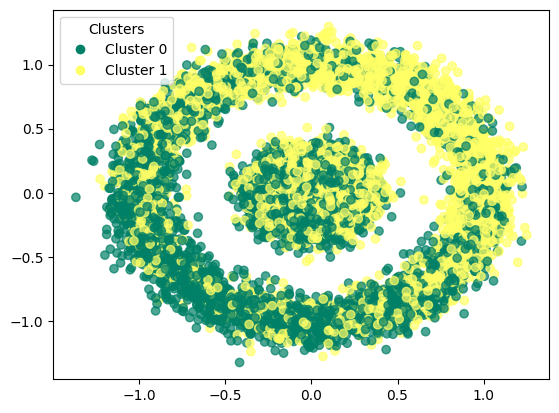

In [108]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

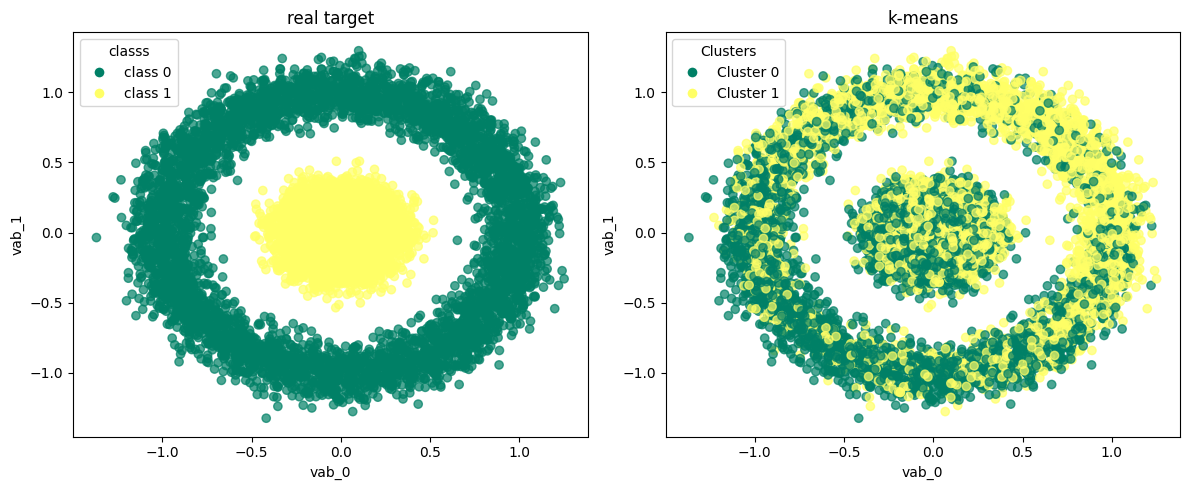

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

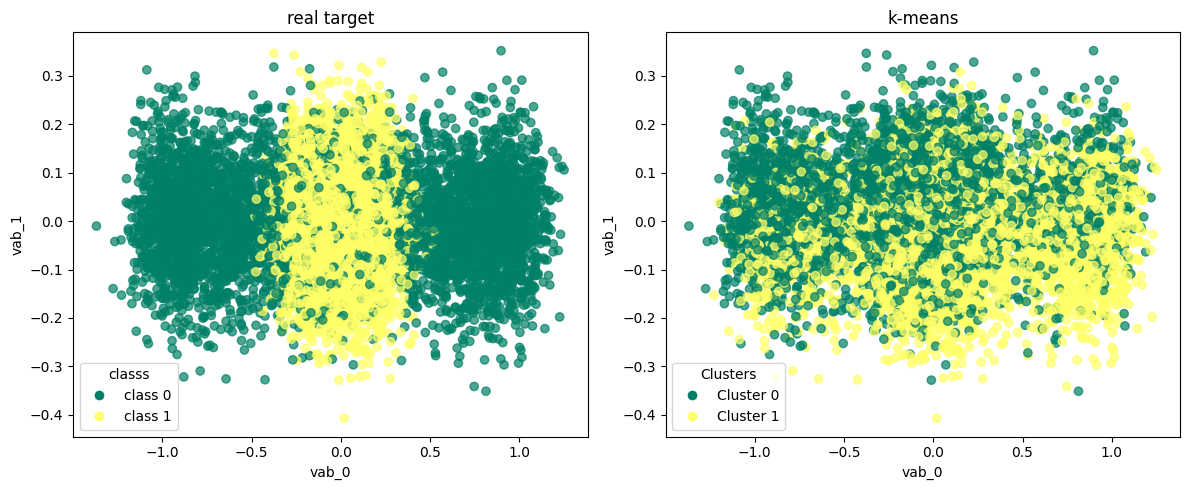

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

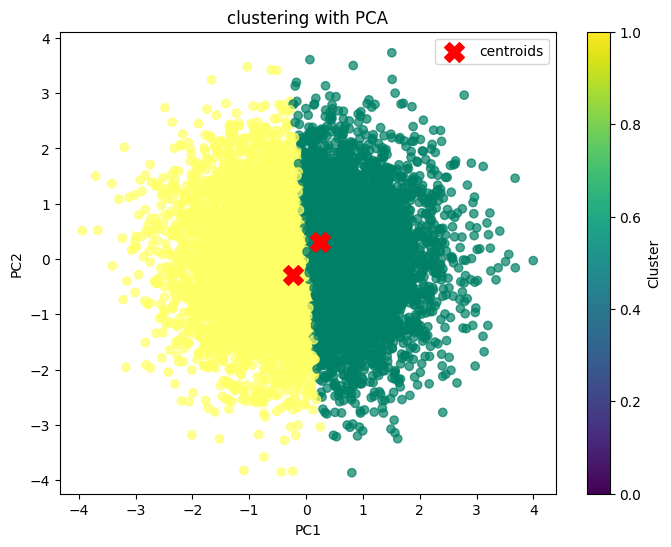

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

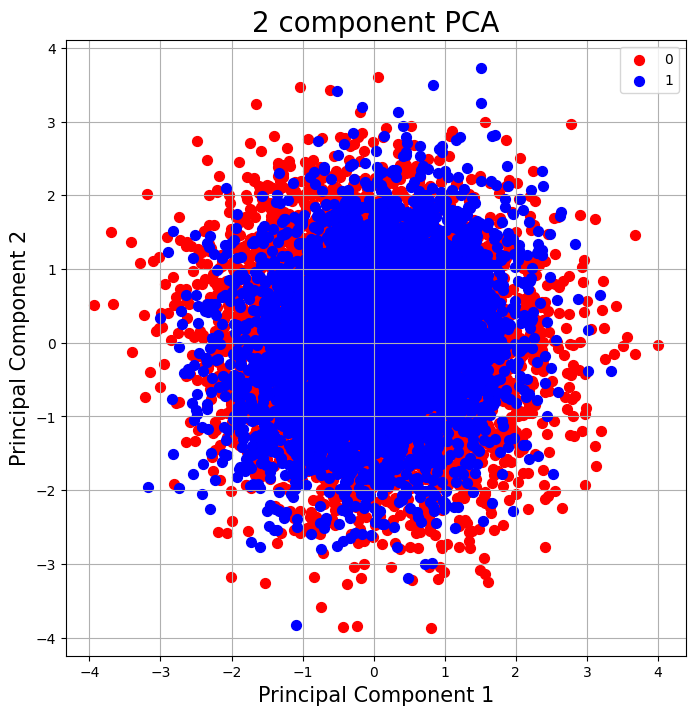

In [112]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [113]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [114]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [115]:
df_tsne_kmeans = df_circles.copy()

In [116]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [117]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,1,0
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,1,1
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,0,0
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,1,0
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,0,1
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,1,0
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,0,1
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,1,0


In [118]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.4927
accuracy after: 0.5073


In [119]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,-0.046481,0.041000,0.053445,-0.069576,0.017322,-0.044039,-0.141001,0.245366,1,1,1
1,1.198440,-0.542104,0.053201,-0.110426,-0.011104,0.185076,-0.142947,-0.027524,0.014564,-0.037983,0,1,0
2,-0.618907,0.728517,0.010837,0.146582,-0.141263,-0.102655,-0.003800,0.115299,0.083252,-0.036288,0,0,1
3,1.070839,-0.340617,-0.132552,-0.054344,-0.049077,0.054009,0.008425,0.025990,0.087414,0.073689,0,1,1
4,0.843196,-0.502865,-0.023739,-0.044858,-0.012816,-0.011890,-0.073300,-0.115120,-0.147453,-0.097701,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.022131,-0.054976,-0.049651,-0.106894,0.027052,-0.181332,0.040903,-0.111463,1,0,0
9996,0.239543,0.141312,-0.045674,-0.073534,0.064474,0.017727,-0.106599,0.034388,-0.020957,0.094286,1,1,1
9997,0.108542,0.082195,0.112351,-0.104032,0.066119,0.014243,0.084345,0.089602,0.029283,-0.002236,1,0,0
9998,0.483035,0.891054,-0.104341,0.171581,-0.037914,-0.082613,-0.148197,-0.123182,0.115263,-0.117676,0,1,1


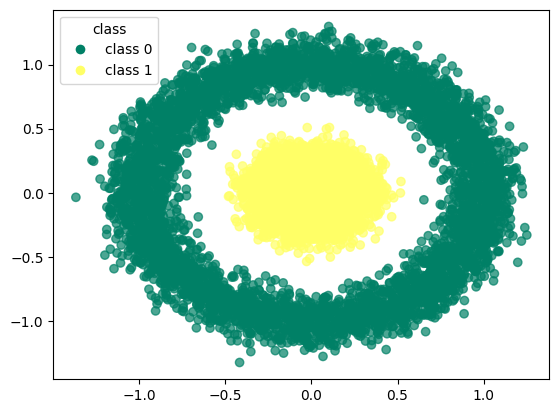

In [120]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

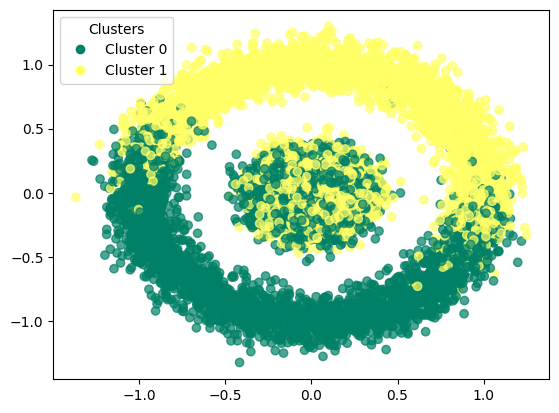

In [121]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0],df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'],cmap='summer',alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

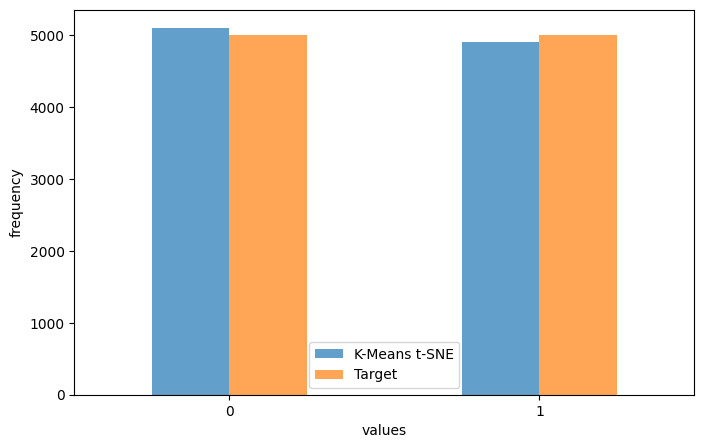

In [122]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [123]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2586 2414]
 [2513 2487]]


In [124]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      5000
           1       0.51      0.50      0.50      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [125]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [126]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      5000
           1       0.50      0.50      0.50      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

